---
title: 👀Code-4-Machine-Learning
password: ""
tags:
  - 人工智能
  - 机器学习
  - 信息论
  - python
katex: false
comments: true
aside: true
date: 2022-04-11 15:07:22
cover: https://www.helloimg.com/images/2022/04/07/RsEzqc.png
top_img:
---

<!--
 * @?: *********************************************************************
 * @Author: Weidows
 * @LastEditors: Weidows
 * @LastEditTime: 2022-02-23 02:28:46
 * @FilePath: \Blog-private\scaffolds\post.md
 * @Description:
 * @!: *********************************************************************
-->

## 序

此文为其他文章的代码部分:

> [🥵硬啃-Machine-Learning](../../AI/ML)

也提供了 notebook 形式: [代码地址](https://github.com/Weidows-projects/public-post/blob/main/notebook/ML/_ML.ipynb)

<a>![分割线](https://cdn.jsdelivr.net/gh/Weidows/Weidows/image/divider.png)</a>

## 数据预处理方法

### 标准化-均值移除


In [29]:
# 数据预处理之：均值移除示例
import numpy as np
import sklearn.preprocessing as sp

# 样本数据
raw_samples = np.array([
    [3.0, -1.0, 2.0],\
    [0.0, 4.0, 3.0], \
    [1.0, -4.0, 2.0]]\
)

# 求每列的平均值 axis=0为列, =1为行 不填就计算所有值
print(raw_samples.mean(axis=0))
# 求每列标准差
print(raw_samples.std(axis=0))

std_samples = raw_samples.copy()  # 复制样本数据
for col in std_samples.T:  # .T为转置,遍历每列
    col_mean = col.mean()  # 计算平均数
    col_std = col.std()  # 求标准差
    col -= col_mean  # 减平均值
    col /= col_std  # 除标准差

# 均值无限趋近0,但可能不是0
print(std_samples.mean(axis=0))
print(std_samples.std(axis=0))

# scale 标准移除,与上面功能相同
std_samples = sp.scale(raw_samples)
print(std_samples.mean(axis=0))
print(std_samples.std(axis=0))

[ 1.33333333 -0.33333333  2.33333333]
[1.24721913 3.29983165 0.47140452]
[ 5.55111512e-17  0.00000000e+00 -2.96059473e-16]
[1. 1. 1.]
[ 5.55111512e-17  0.00000000e+00 -2.96059473e-16]
[1. 1. 1.]


### 范围缩放


In [9]:
# 数据预处理之：范围缩放
import numpy as np
import sklearn.preprocessing as sp

# 样本数据
raw_samples = np.array([
    [1.0, 2.0, 3.0],\
    [4.0, 5.0, 6.0],\
    [7.0, 8.0, 9.0]]).astype("float64")

mms_samples = raw_samples.copy()  # 复制样本数据

for col in mms_samples.T:
    col_min = col.min()
    col_max = col.max()
    col -= col_min
    col /= (col_max - col_min)
print(mms_samples)

# 根据给定范围创建一个范围缩放器对象
# 使用范围缩放器实现特征值范围缩放
mms_samples = sp.MinMaxScaler(feature_range=(0, 1))\
  .fit_transform(raw_samples)  # 缩放
print(mms_samples)

[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


### 归一化


In [11]:
import numpy as np
import sklearn.preprocessing as sp

# 样本数据
raw_samples = np.array([
    [10.0, 20.0, 5.0],\
    [8.0, 10.0, 1.0]])

nor_samples = raw_samples.copy()
for row in nor_samples:
    row /= abs(row).sum()  # 先对行求绝对值，再求和，再除以绝对值之和
print(nor_samples)  # 打印结果

# norm=l1  /=绝对值之和
# norm=l2  /=平方之和
nor_samples = sp.normalize(raw_samples.copy(), norm='l1')
print(nor_samples)  # 打印结果


[[0.28571429 0.57142857 0.14285714]
 [0.42105263 0.52631579 0.05263158]]
[[0.28571429 0.57142857 0.14285714]
 [0.42105263 0.52631579 0.05263158]]


### 二值化


In [12]:
# 二值化
import numpy as np
import sklearn.preprocessing as sp

raw_samples = np.array([[65.5, 89.0, 73.0],\
                        [55.0, 99.0, 98.5],\
                        [45.0, 22.5, 60.0]])

bin_samples = raw_samples.copy()  # 复制数组
# 生成掩码数组
mask1 = bin_samples < 60
print(mask1)
mask2 = bin_samples >= 60

# 通过掩码进行二值化处理 (只转换True的位置)
bin_samples[mask1] = 0
print(bin_samples)
bin_samples[mask2] = 1

print(bin_samples)  # 打印结果

bin_transformer = sp.Binarizer(threshold=60 - 1)  # 创建二值化对象(注意边界值)
bin_samples = bin_transformer.transform(raw_samples.copy())  # 二值化预处理
print(bin_samples)

[[False False False]
 [ True False False]
 [ True  True False]]
[[65.5 89.  73. ]
 [ 0.  99.  98.5]
 [ 0.   0.  60. ]]
[[1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]
[[1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]


### 独热编码示例


In [13]:
import numpy as np
import sklearn.preprocessing as sp

raw_samples = np.array([[1, 3, 2],\
                        [7, 5, 4],\
                        [1, 8, 6],\
                        [7, 3, 9]])

one_hot_encoder = sp.OneHotEncoder(
    sparse=False,  # 是否采用稀疏格式
    dtype="int32",
    categories="auto")  # 自动编码

# 执行独热编码
oh_samples = one_hot_encoder.fit_transform(raw_samples.copy())
print(oh_samples)

print(one_hot_encoder.inverse_transform(oh_samples))  # 解码


[[1 0 1 0 0 1 0 0 0]
 [0 1 0 1 0 0 1 0 0]
 [1 0 0 0 1 0 0 1 0]
 [0 1 1 0 0 0 0 0 1]]
[[1 3 2]
 [7 5 4]
 [1 8 6]
 [7 3 9]]


### 标签编码


In [14]:
import numpy as np
import sklearn.preprocessing as sp

raw_samples = np.array(['audi', 'ford', 'audi', 'bmw', 'ford', 'bmw'])

lb_encoder = sp.LabelEncoder()  # 定义标签编码对象
lb_samples = lb_encoder.fit_transform(raw_samples.copy())  # 执行标签编码
print(lb_samples)

print(lb_encoder.inverse_transform(lb_samples))  # 逆向转换


[0 2 0 1 2 1]
['audi' 'ford' 'audi' 'bmw' 'ford' 'bmw']


## 基本问题

### 回归问题

#### 线性回归


1: w0=1.000000, w1=1.000000, loss=44.175000
2: w0=1.209000, w1=1.190600, loss=36.538828
3: w0=1.399164, w1=1.363579, loss=30.231687
4: w0=1.572208, w1=1.520546, loss=25.022227
5: w0=1.729693, w1=1.662961, loss=20.719373
6: w0=1.873039, w1=1.792151, loss=17.165309
7: w0=2.003532, w1=1.909325, loss=14.229691
8: w0=2.122345, w1=2.015577, loss=11.804865
9: w0=2.230542, w1=2.111905, loss=9.801916
10: w0=2.329091, w1=2.199215, loss=8.147408
11: w0=2.418871, w1=2.278330, loss=6.780688
12: w0=2.500681, w1=2.349997, loss=5.651660
13: w0=2.575247, w1=2.414898, loss=4.718950
14: w0=2.643230, w1=2.473648, loss=3.948384
15: w0=2.705228, w1=2.526811, loss=3.311740
16: w0=2.761786, w1=2.574896, loss=2.785706
17: w0=2.813402, w1=2.618367, loss=2.351029
18: w0=2.860524, w1=2.657645, loss=1.991807
19: w0=2.903561, w1=2.693114, loss=1.694907
20: w0=2.942886, w1=2.725122, loss=1.449482
21: w0=2.978836, w1=2.753985, loss=1.246572
22: w0=3.011719, w1=2.779990, loss=1.078777
23: w0=3.041814, w1=2.803399, los

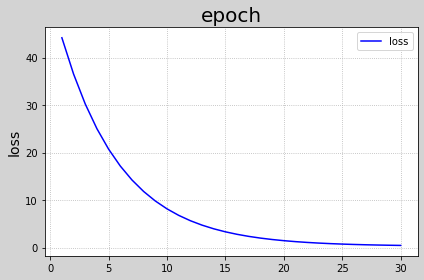

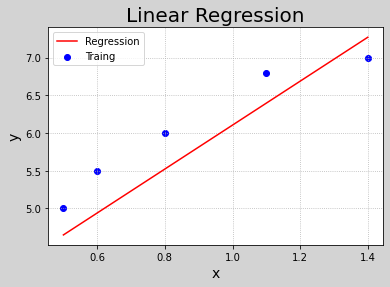

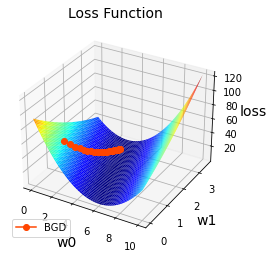

In [4]:
import numpy as np
import matplotlib.pyplot as mp
from mpl_toolkits.mplot3d import axes3d
import sklearn.preprocessing as sp

# 训练数据集
train_x = np.array([0.5, 0.6, 0.8, 1.1, 1.4])  # 输入集
train_y = np.array([5.0, 5.5, 6.0, 6.8, 7.0])  # 输出集

n_epochs = 30  # 迭代次数
l_rate = 0.01  # 学习率
epochs = []  # 记录迭代次数
losses = []  # 记录损失值

w0, w1 = [1], [1]  # 模型初始值

for i in range(1, n_epochs + 1):
    epochs.append(i)  # 记录第几次迭代

    y = w0[-1] + w1[-1] * train_x  # 取出最新的w0,w1计算线性方程输出
    # 损失函数(均方差)
    loss = (((train_y - y)**2).sum()) / 2
    losses.append(loss)  # 记录每次迭代的损失值

    print("%d: w0=%f, w1=%f, loss=%f" % (i, w0[-1], w1[-1], loss))

    # 计算w0,w1的偏导数
    d0 = -(train_y - y).sum()
    d1 = -(train_x * (train_y - y)).sum()

    # 更新w0,w1
    w0.append(w0[-1] - (d0 * l_rate))
    w1.append(w1[-1] - (d1 * l_rate))

###################### 训练过程可视化 ######################
## 损失函数收敛过程
w0 = np.array(w0[:-1])
w1 = np.array(w1[:-1])

mp.figure("Losses", facecolor="lightgray")  # 创建一个窗体
mp.title("epoch", fontsize=20)
mp.ylabel("loss", fontsize=14)
mp.grid(linestyle=":")  # 网格线：虚线
mp.plot(epochs, losses, c="blue", label="loss")
mp.legend()  # 图例
mp.tight_layout()  # 紧凑格式

## 显示模型直线
pred_y = w0[-1] + w1[-1] * train_x  # 根据x预测y
mp.figure("Linear Regression", facecolor="lightgray")
mp.title("Linear Regression", fontsize=20)
mp.xlabel("x", fontsize=14)
mp.ylabel("y", fontsize=14)
mp.grid(linestyle=":")
mp.scatter(train_x, train_y, c="blue", label="Traing")  # 绘制样本散点图
mp.plot(train_x, pred_y, c="red", label="Regression")
mp.legend()

# 显示梯度下降过程(复制粘贴即可，不需要编写)
# 计算损失函数曲面上的点 loss = f(w0, w1)
arr1 = np.linspace(0, 10, 500)  # 0~9间产生500个元素的均匀列表
arr2 = np.linspace(0, 3.5, 500)  # 0~3.5间产生500个元素的均匀列表

grid_w0, grid_w1 = np.meshgrid(arr1, arr2)  # 产生二维矩阵

flat_w0, flat_w1 = grid_w0.ravel(), grid_w1.ravel()  # 二维矩阵扁平化
loss_metrix = train_y.reshape(-1, 1)  # 生成误差矩阵（-1,1）表示自动计算维度
outer = np.outer(train_x, flat_w1)  # 求外积（train_x和flat_w1元素两两相乘的新矩阵）
# 计算损失：((w0 + w1*x - y)**2)/2
flat_loss = (((flat_w0 + outer - loss_metrix)**2).sum(axis=0)) / 2
grid_loss = flat_loss.reshape(grid_w0.shape)

mp.figure('Loss Function')
ax = mp.axes(projection='3d')
mp.title('Loss Function', fontsize=14)
ax.set_xlabel('w0', fontsize=14)
ax.set_ylabel('w1', fontsize=14)
ax.set_zlabel('loss', fontsize=14)
ax.plot_surface(grid_w0,
                grid_w1,
                grid_loss,
                rstride=10,
                cstride=10,
                cmap='jet')
ax.plot(w0, w1, losses, 'o-', c='orangered', label='BGD', zorder=5)
mp.legend(loc='lower left')

mp.show()


coef_: [2.2189781]
intercept_: 4.107299270072994


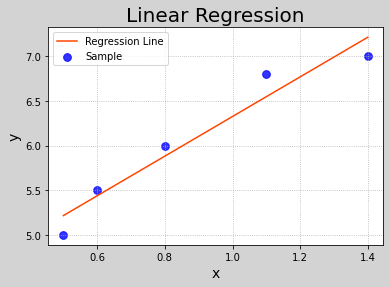

In [6]:
# 利用LinearRegression实现线性回归
import numpy as np
import sklearn.linear_model as lm  # 线性模型# 线性模型
import sklearn.metrics as sm  # 模型性能评价模块
import matplotlib.pyplot as mp

train_x = np.array([[0.5], [0.6], [0.8], [1.1], [1.4]])  # 输入集
train_y = np.array([5.0, 5.5, 6.0, 6.8, 7.0])  # 输出集

# 创建线性回归器
line_model = lm.LinearRegression()
# 用已知输入、输出数据集训练回归器
line_model.fit(train_x, train_y)
# 根据训练模型预测输出
pred_y = line_model.predict(train_x)

print("coef_:", line_model.coef_)  # 系数
print("intercept_:", line_model.intercept_)  # 截距

# 可视化回归曲线
mp.figure('Linear Regression', facecolor='lightgray')
mp.title('Linear Regression', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')

# 绘制样本点
mp.scatter(train_x, train_y, c='blue', alpha=0.8, s=60, label='Sample')

# 绘制拟合直线
mp.plot(
    train_x,  # x坐标数据
    pred_y,  # y坐标数据
    c='orangered',
    label='Regression Line')

mp.legend()  # 左上角的图例
mp.show()


(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]


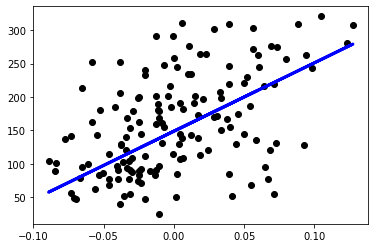

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

# science kit learn 自带的糖尿病数据
X, y = datasets.load_diabetes(return_X_y=True)
# 442 * 10 大小的二维数组
print(X.shape)
# No.1 * 10
print(X[0])

# 只取第二维的第三列作为特征输入 (也就是0.06169621这一列)
X = X[:, np.newaxis, 2]

# train : test = 2 : 1
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.33)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

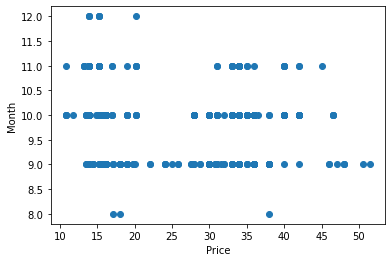

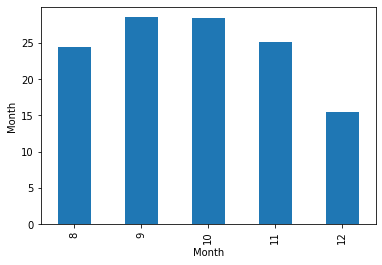

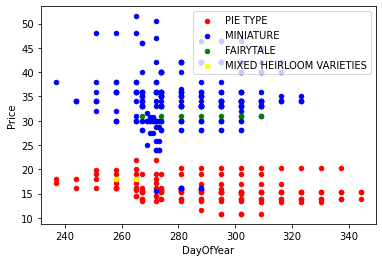

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('./_data_set/US-pumpkins.csv')

pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel',
                                                     case=True,
                                                     regex=True)]

# pumpkins.head()

# pumpkins.isnull().sum()

# A set of new columns for a new dataframe. Filter out nonmatching columns
pumpkins = pumpkins.drop([
    c for c in pumpkins.columns if c not in [
        'Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price',
        'Date'
    ]
],
                         axis=1)

# Get an average between low and high price for the base pumpkin price
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

# Create a new dataframe with this basic data
new_pumpkins = pd.DataFrame({
    # Convert the date to its month only
    'Month':
    pd.DatetimeIndex(pumpkins['Date']).month,
    'DayOfYear':
    pd.to_datetime(pumpkins['Date']).apply(
        lambda dt: (dt - datetime(dt.year, 1, 1)).days),
    'Variety':
    pumpkins['Variety'],
    'City':
    pumpkins['City Name'],
    'Package':
    pumpkins['Package'],
    'Low Price':
    pumpkins['Low Price'],
    'High Price':
    pumpkins['High Price'],
    'Price':
    price
})

# Convert the price if the Package contains fractional bushel values
# loc 遍历Package列中包含 '1 1/9' 的行, 对每行的 Price 列进行操作
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'),
                 'Price'] = price / (1 + 1 / 9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'),
                 'Price'] = price / (1 / 2)

# 散点图
plt.scatter(new_pumpkins.Price, new_pumpkins.Month)
plt.xlabel('Price')
plt.ylabel('Month')
plt.show()

# 柱状图
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel('Month')

ax = None
colors = ['red', 'blue', 'green', 'yellow']
for i, var in enumerate(new_pumpkins['Variety'].unique()):
    ax = new_pumpkins[new_pumpkins['Variety'] == var].plot.scatter('DayOfYear',
                                                                   'Price',
                                                                   ax=ax,
                                                                   c=colors[i],
                                                                   label=var)


#### 多项式回归

Mean error: 2.73 (17.0%)
Model determination:  0.07639977655280084


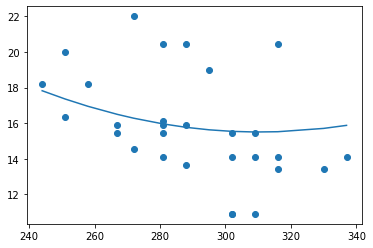

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pumpkins = pd.read_csv('./_data_set/US-pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel',
                                                     case=True,
                                                     regex=True)]
pumpkins = pumpkins.drop([
    c for c in pumpkins.columns if c not in [
        'Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price',
        'Date'
    ]
],
                         axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

new_pumpkins = pd.DataFrame({
    'Month':
    pd.DatetimeIndex(pumpkins['Date']).month,
    'DayOfYear':
    pd.to_datetime(pumpkins['Date']).apply(
        lambda dt: (dt - datetime(dt.year, 1, 1)).days),
    'Variety':
    pumpkins['Variety'],
    'City':
    pumpkins['City Name'],
    'Package':
    pumpkins['Package'],
    'Low Price':
    pumpkins['Low Price'],
    'High Price':
    pumpkins['High Price'],
    'Price':
    price
})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'),
                 'Price'] = price / 1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'),
                 'Price'] = price * 2

pie_pumpkins = new_pumpkins[new_pumpkins['Variety'] == 'PIE TYPE']

X_train, X_test, y_train, y_test = train_test_split(
    pie_pumpkins['DayOfYear'].to_numpy().reshape(-1, 1),
    pie_pumpkins['Price'],
    test_size=0.2,
    random_state=0)

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test, pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train, y_train)
print('Model determination: ', score)

plt.scatter(X_test, y_test)
plt.plot(sorted(X_test), pipeline.predict(sorted(X_test)))


### 决策树-随机森林

#### 决策树分类


训练集正确率： 0.9523809523809523
测试集正确率： 0.6222222222222222
(2500, 2)
x_show = 
 [[4.3        2.        ]
 [4.37346939 2.        ]
 [4.44693878 2.        ]
 ...
 [7.75306122 4.4       ]
 [7.82653061 4.4       ]
 [7.9        4.4       ]]
(2500,)
[0 0 0 ... 2 2 2]
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


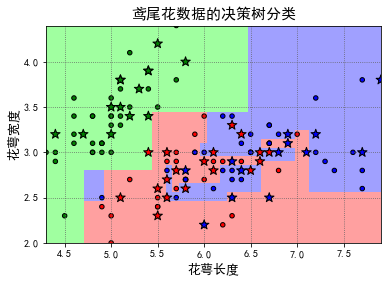

[0 1 2 0 2 2 1 0 0 2 2 0 1 2 1 0 2 1 0 0 1 0 2 0 2 1 0 0 1 1 2 2 2 2 1 0 1
 0 2 1 2 0 1 1 1]
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
准确度: 62.22%
1  测试集错误率: 44.44%
2  测试集错误率: 40.00%
3  测试集错误率: 20.00%
4  测试集错误率: 24.44%
5  测试集错误率: 24.44%
6  测试集错误率: 28.89%
7  测试集错误率: 37.78%
8  测试集错误率: 40.00%
9  测试集错误率: 37.78%
10  测试集错误率: 40.00%
11  测试集错误率: 37.78%
12  测试集错误率: 37.78%
13  测试集错误率: 40.00%
14  测试集错误率: 37.78%


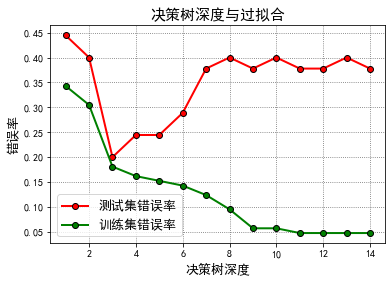

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pydotplus

mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False

iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = '花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

path = './_data_set/iris_classification/iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x = data[list(range(4))]
# y = pd.Categorical(data[4]).codes
y = LabelEncoder().fit_transform(data[4])
# 为了可视化，仅使用前两列特征
x = x[[0, 1]]
# x = x.iloc[:, :2]
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

# 决策树参数估计
# min_samples_split = 10：如果该结点包含的样本数目大于10，则(有可能)对其分支
# min_samples_leaf = 10：若将某结点分支后，得到的每个子结点样本数目都大于10，则完成分支；否则，不进行分支
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
print('训练集正确率：', accuracy_score(y_train, y_train_pred))
y_test_hat = model.predict(x_test)  # 测试数据
print('测试集正确率：', accuracy_score(y_test, y_test_hat))

# 保存
# dot -Tpng my.dot -o my.png
# 1、输出
# with open('iris.dot', 'w') as f:
#     tree.export_graphviz(model, out_file=f, feature_names=iris_feature_E[0:2], class_names=iris_class,
#                          filled=True, rounded=True, special_characters=True)
tree.export_graphviz(model,
                     out_file='./_data_set/iris_classification/iris.dot',
                     feature_names=iris_feature_E[0:2],
                     class_names=iris_class,
                     filled=True,
                     rounded=True,
                     special_characters=True)
# 2、给定文件名
# tree.export_graphviz(model, out_file='iris.dot')
# tree.export_graphviz(model, out_file='iris.dot')
# 3、输出为pdf格式
dot_data = tree.export_graphviz(model,
                                out_file=None,
                                feature_names=iris_feature_E[0:2],
                                class_names=iris_class,
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('./_data_set/iris_classification/iris.pdf')
f = open('./_data_set/iris_classification/iris.png', 'wb')
f.write(graph.create_png())
f.close()

# 画图
N, M = 50, 50  # 横纵各采样多少个值
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
print(x_show.shape)
print('x_show = \n', x_show)

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_show_hat = model.predict(x_show)  # 预测值
print(y_show_hat.shape)
print(y_show_hat)
y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
print(y_show_hat)
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light, shading='auto')  # 预测值的显示
plt.scatter(x_test[0],
            x_test[1],
            c=y_test.ravel(),
            edgecolors='k',
            s=100,
            zorder=10,
            cmap=cm_dark,
            marker='*')  # 测试数据
plt.scatter(x[0], x[1], c=y.ravel(), edgecolors='k', s=20,
            cmap=cm_dark)  # 全部数据
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(b=True, ls=':', color='#606060')
plt.title('鸢尾花数据的决策树分类', fontsize=15)
plt.show()

# 训练集上的预测结果
y_test = y_test.reshape(-1)
print(y_test_hat)
print(y_test)
result = (y_test_hat == y_test)  # True则预测正确，False则预测错误
acc = np.mean(result)
print('准确度: %.2f%%' % (100 * acc))

# 过拟合：错误率
depth = np.arange(1, 15)
err_train_list = []
err_test_list = []
clf = DecisionTreeClassifier(criterion='entropy')
for d in depth:
    clf.set_params(max_depth=d)
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    err_train = 1 - accuracy_score(y_train, y_train_pred)
    err_train_list.append(err_train)
    y_test_pred = clf.predict(x_test)
    err_test = 1 - accuracy_score(y_test, y_test_pred)
    err_test_list.append(err_test)
    print(d, ' 测试集错误率: %.2f%%' % (100 * err_test))
plt.figure(facecolor='w')
plt.plot(depth,
         err_test_list,
         'ro-',
         markeredgecolor='k',
         lw=2,
         label='测试集错误率')
plt.plot(depth,
         err_train_list,
         'go-',
         markeredgecolor='k',
         lw=2,
         label='训练集错误率')
plt.xlabel('决策树深度', fontsize=13)
plt.ylabel('错误率', fontsize=13)
plt.legend(loc='lower left', fontsize=13)
plt.title('决策树深度与过拟合', fontsize=15)
plt.grid(b=True, ls=':', color='#606060')
plt.show()

#### 随机森林


特征： 花萼长度  +  花萼宽度
	训练集准确率: 85.7143%
	测试集准确率: 71.1111%

特征： 花萼长度  +  花瓣长度
	训练集准确率: 96.1905%
	测试集准确率: 91.1111%

特征： 花萼长度  +  花瓣宽度
	训练集准确率: 96.1905%
	测试集准确率: 86.6667%

特征： 花萼宽度  +  花瓣长度
	训练集准确率: 97.1429%
	测试集准确率: 95.5556%

特征： 花萼宽度  +  花瓣宽度
	训练集准确率: 96.1905%
	测试集准确率: 84.4444%

特征： 花瓣长度  +  花瓣宽度
	训练集准确率: 98.0952%
	测试集准确率: 97.7778%



C:\Users\utsuk\AppData\Local\Temp\ipykernel_25000\2108356862.py:83: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1, rect=(0, 0, 1, 0.94))  # (left, bottom, right, top)


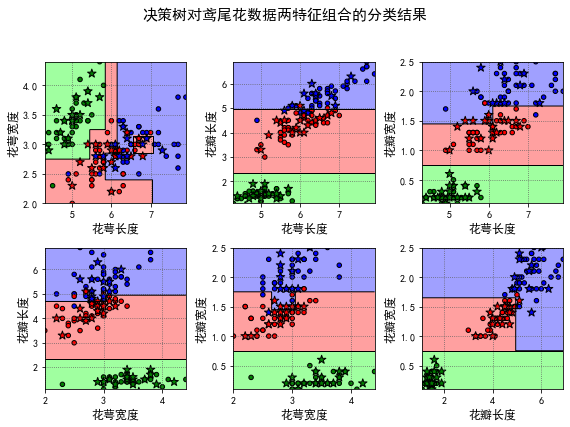

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
path = './_data_set/iris_classification/iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x_prime = data[list(range(4))]
y = pd.Categorical(data[4]).codes
x_prime_train, x_prime_test, y_train, y_test = train_test_split(x_prime,
                                                                y,
                                                                train_size=0.7,
                                                                random_state=0)

feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
plt.figure(figsize=(8, 6), facecolor='#FFFFFF')
for i, pair in enumerate(feature_pairs):
    # 准备数据
    x_train = x_prime_train[pair]
    x_test = x_prime_test[pair]

    # 决策树学习
    model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
    model.fit(x_train, y_train)

    N, M = 500, 500  # 横纵各采样多少个值
    x1_min, x2_min = x_train.min()
    x1_max, x2_max = x_train.max()
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
    x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

    # 训练集上的预测结果
    y_train_pred = model.predict(x_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    y_test_pred = model.predict(x_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    print('特征：', iris_feature[pair[0]], ' + ', iris_feature[pair[1]])
    print('\t训练集准确率: %.4f%%' % (100 * acc_train))
    print('\t测试集准确率: %.4f%%\n' % (100 * acc_test))

    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = model.predict(x_show)
    y_hat = y_hat.reshape(x1.shape)
    plt.subplot(2, 3, i + 1)
    plt.contour(x1,
                x2,
                y_hat,
                colors='k',
                levels=[0, 1],
                antialiased=True,
                linewidths=1)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light, shading='auto')  # 预测值
    plt.scatter(x_train[pair[0]],
                x_train[pair[1]],
                c=y_train,
                s=20,
                edgecolors='k',
                cmap=cm_dark,
                label=u'训练集')
    plt.scatter(x_test[pair[0]],
                x_test[pair[1]],
                c=y_test,
                s=80,
                marker='*',
                edgecolors='k',
                cmap=cm_dark,
                label=u'测试集')
    plt.xlabel(iris_feature[pair[0]], fontsize=12)
    plt.ylabel(iris_feature[pair[1]], fontsize=12)
    # plt.legend(loc='upper right', fancybox=True, framealpha=0.3)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid(b=True, ls=':', color='#606060')
plt.suptitle(u'决策树对鸢尾花数据两特征组合的分类结果', fontsize=15)
plt.tight_layout(1, rect=(0, 0, 1, 0.94))  # (left, bottom, right, top)
plt.show()


#### 决策树-随机森林回归


[[-2.95013857]
 [-2.91406777]
 [-2.90709403]
 [-2.90375999]
 [-2.87745415]
 [-2.86685497]
 [-2.84070033]
 [-2.81375697]
 [-2.77943784]
 [-2.77745775]
 [-2.66347611]
 [-2.65986762]
 [-2.64217075]
 [-2.63778267]
 [-2.63639243]
 [-2.60165162]
 [-2.48896096]
 [-2.43041085]
 [-2.39941506]
 [-2.38779079]
 [-2.37856289]
 [-2.32809632]
 [-2.29426051]
 [-2.25524085]
 [-2.23914776]
 [-2.16578847]
 [-2.0055294 ]
 [-1.9885004 ]
 [-1.73199798]
 [-1.61893958]
 [-1.58908223]
 [-1.54966302]
 [-1.49074428]
 [-1.46530843]
 [-1.40362808]
 [-1.3935955 ]
 [-1.3928819 ]
 [-1.37684247]
 [-1.3377295 ]
 [-1.33035029]
 [-1.24577529]
 [-1.15561278]
 [-1.12976361]
 [-0.92771942]
 [-0.91536325]
 [-0.83851709]
 [-0.54828961]
 [-0.54587447]
 [-0.54456521]
 [-0.51610774]
 [-0.38078143]
 [-0.27298529]
 [-0.20898971]
 [-0.20866835]
 [ 0.01703485]
 [ 0.03203468]
 [ 0.06107388]
 [ 0.07358949]
 [ 0.07361575]
 [ 0.10676155]
 [ 0.15818226]
 [ 0.20123638]
 [ 0.3410772 ]
 [ 0.45680655]
 [ 0.52384169]
 [ 0.65741898]
 [ 0.68306

C:\Users\utsuk\AppData\Local\Temp\ipykernel_25000\2984870596.py:33: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(2)


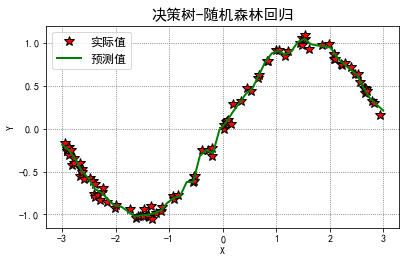

C:\Users\utsuk\AppData\Local\Temp\ipykernel_25000\2984870596.py:60: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(2)


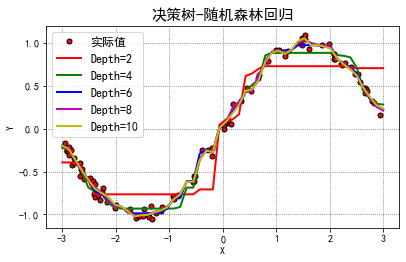

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

N = 100

# [-3,3)
x = np.random.rand(N) * 6 - 3
x.sort()
y = np.sin(x) + np.random.randn(N) * 0.05
x = x.reshape(-1, 1)

print(x)
print(y)

# model = DecisionTreeRegressor(criterion='mse', max_depth=10)
model = RandomForestRegressor(n_estimators=20, criterion='mse', max_depth=10)
model.fit(x, y)
x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
y_hat = model.predict(x_test)

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(x, y, 'r*', markersize=10, markeredgecolor='k', label='实际值')
plt.plot(x_test, y_hat, 'g-', linewidth=2, label='预测值')
plt.legend(loc='upper left', fontsize=12)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(b=True, ls=':', color='#606060')
plt.title('决策树-随机森林回归', fontsize=15)
plt.tight_layout(2)
plt.show()

# 比较决策树的深度影响
depth = [2, 4, 6, 8, 10]
clr = 'rgbmy'
# model = DecisionTreeRegressor(criterion='mse')
model = RandomForestRegressor(n_estimators=20, criterion='mse')
plt.figure(facecolor='w')
plt.plot(x, y, 'ro', ms=5, mec='k', label='实际值')
x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
for d, c in zip(depth, clr):
    model.set_params(max_depth=d)
    model.fit(x, y)
    y_hat = model.predict(x_test)
    plt.plot(x_test,
             y_hat,
             '-',
             color=c,
             linewidth=2,
             markeredgecolor='k',
             label='Depth=%d' % d)
plt.legend(loc='upper left', fontsize=12)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(b=True, ls=':', color='#606060')
plt.title('决策树-随机森林回归', fontsize=15)
plt.tight_layout(2)
plt.show()

### 分类问题


#### 逻辑回归

##### 二分类


[1 0]
grid_x.shape: (1100, 700)
grid_y.shape: (1100, 700)
mesh_x.shape: (770000, 2)


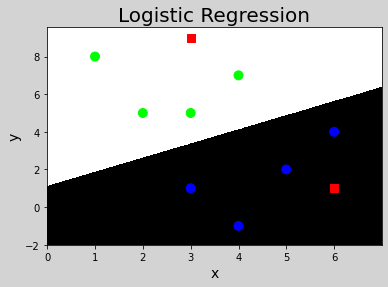

In [3]:
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as mp

x = np.array([[3, 1], [2, 5], [1, 8], [6, 4],\
              [5, 2], [3, 5], [4, 7], [4, -1]])
y = np.array([0, 1, 1, 0, 0, 1, 1, 0])

# 创建逻辑分类器对象
# C参数：正则强度，越大拟合效果越小，通过调整该参数防止过拟合
# solver参数：逻辑函数中指数的函数关系（liblinear表示线性关系）
model = lm.LogisticRegression()
model.fit(x, y)  # 训练

# 预测
test_x = np.array([[3, 9], [6, 1]])
test_y = model.predict(test_x)  # 预测
print(test_y)

# 计算显示坐标的边界
# x[:, 0].min()   x 中所有数组的第一位
left = x[:, 0].min() - 1
right = x[:, 0].max() + 1
buttom = x[:, 1].min() - 1
top = x[:, 1].max() + 1

# 产生网格化矩阵
grid_x, grid_y = np.meshgrid(np.arange(left, right, 0.01),
                             np.arange(buttom, top, 0.01))

print("grid_x.shape:", grid_x.shape)
print("grid_y.shape:", grid_y.shape)

# 将x,y坐标合并成两列
mesh_x = np.column_stack((grid_x.ravel(), grid_y.ravel()))
print("mesh_x.shape:", mesh_x.shape)

# 根据每个点的xy坐标进行预测，并还原成二维形状
mesh_z = model.predict(mesh_x)
mesh_z = mesh_z.reshape(grid_x.shape)

mp.figure('Logistic Regression', facecolor='lightgray')
mp.title('Logistic Regression', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x, grid_y, mesh_z, cmap='gray', shading='auto')
mp.scatter(
    x[:, 0],  # 样本x坐标
    x[:, 1],  # 样本y坐标
    c=y,
    cmap='brg',
    s=80)
mp.scatter(test_x[:, 0], test_x[:, 1], c="red", marker='s', s=80)
mp.show()

##### 多分类


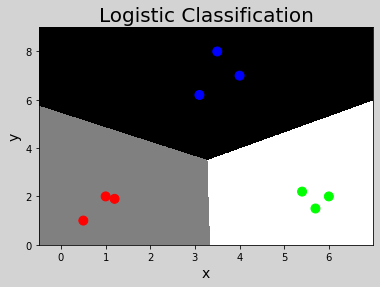

In [5]:
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as mp

# 输入
x = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2], [1.2, 1.9],
              [6, 2], [5.7, 1.5], [5.4, 2.2]])
# 输出（多个类别）
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

# 创建逻辑分类器对象
model = lm.LogisticRegression(C=200)  # 调整该值为1看效果
model.fit(x, y)  # 训练

# 坐标轴范围
left = x[:, 0].min() - 1
right = x[:, 0].max() + 1
h = 0.005

buttom = x[:, 1].min() - 1
top = x[:, 1].max() + 1
v = 0.005

grid_x, grid_y = np.meshgrid(np.arange(left, right, h),
                             np.arange(buttom, top, v))

mesh_x = np.column_stack((grid_x.ravel(), grid_y.ravel()))
mesh_z = model.predict(mesh_x)
mesh_z = mesh_z.reshape(grid_x.shape)

# 可视化
mp.figure('Logistic Classification', facecolor='lightgray')
mp.title('Logistic Classification', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x, grid_y, mesh_z, cmap='gray', shading='auto')
mp.scatter(x[:, 0], x[:, 1], c=y, cmap='brg', s=80)
mp.show()

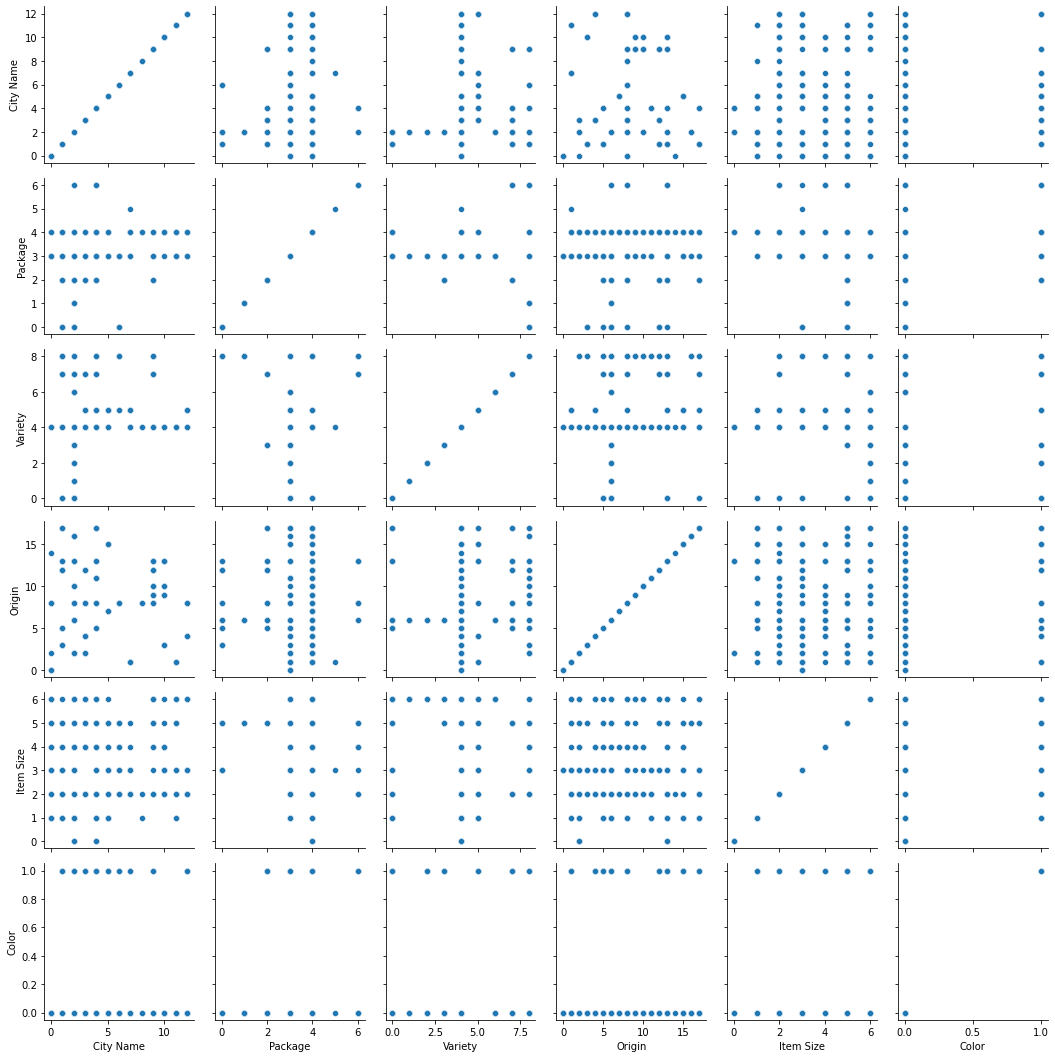

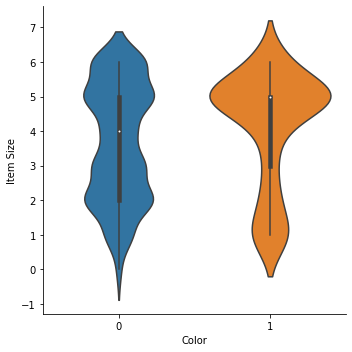

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.pipeline import make_pipeline
import seaborn as sns

pumpkins = pd.read_csv('./_data_set/US-pumpkins.csv')
# pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel',
#                                                      case=True,
#                                                      regex=True)]

new_pumpkins = pumpkins.drop([
    c for c in pumpkins.columns if c not in
    ['Color', 'Origin', 'Item Size', 'Variety', 'City Name', 'Package']
],
                             axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

# 颜色数据与其他列的关系
sns.PairGrid(new_pumpkins).map(sns.scatterplot)

# 分类散点图
# sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins)

# 小提琴图
sns.catplot(x="Color", y="Item Size", kind="violin", data=new_pumpkins)


#### 支持向量机-SVM

##### 核函数

1. 线性

2. 径向基-高斯


GridSearchCV begin...
耗时：0秒
0.7888888888888889
训练集准确率： 0.7888888888888889
0.7833333333333333
测试集准确率： 0.7833333333333333
       0    1
11   4.8  3.4
113  5.7  2.5
123  6.3  2.7
12   4.8  3.0
2    4.7  3.2
decision_function:
 [[ 2.27077043  0.77466667 -0.23050192]
 [-0.26084184  2.25751125  1.0560141 ]
 [-0.28293421  2.25843306  1.22796515]
 [ 2.24308998  0.92588576 -0.2355186 ]
 [ 2.26643883  0.80879936 -0.24170145]
 [-0.28069428  1.23581332  2.24817619]
 [ 2.28018898  0.76457517 -0.24714914]
 [-0.25832462  1.21350955  2.20811726]
 [-0.27289547  1.20094518  2.249947  ]
 [-0.28479994  1.2318958   2.26058535]
 [-0.23449614  2.22389578  1.08207816]
 [-0.27824598  1.19362022  2.2618816 ]
 [-0.24940836  1.20624284  2.19142888]
 [ 2.2732283  -0.2577432   0.82271427]
 [-0.2872948   2.27977562  1.1680301 ]
 [-0.28016055  1.24346593  2.23969255]
 [-0.28069428  1.23581332  2.24817619]
 [-0.17539161  2.25364746  0.77515212]
 [-0.25325305  1.14281388  2.23566431]
 [-0.2421088   2.25159667  0.900724

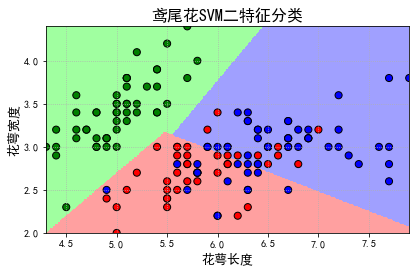

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from time import time

iris_feature = '花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'
path = './_data_set/iris_classification/iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x, y = data[[0, 1]], pd.Categorical(data[4]).codes
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    random_state=1,
                                                    test_size=0.4)

# 分类器
# svm_clf = svm.SVC(C=10, gamma=1, kernel='rbf', decision_function_shape='ovo')
# svm_clf = svm.SVC(C=3, kernel='poly', degree=3)
svm_clf = svm.SVC(C=3, kernel='linear')
print('GridSearchCV begin...')
t = time()
clf = svm_clf
# clf = GridSearchCV(svm_clf, param_grid={'gamma':np.logspace(-2, 2, 10), 'C':np.logspace(-2, 2, 10)}, cv=3)
clf.fit(x_train, y_train.ravel())
t_end = time()
print('耗时：%d秒' % (t_end - t))
# print('最优参数：', clf.best_params_)

# 准确率
print(clf.score(x_train, y_train))  # 精度
print('训练集准确率：', accuracy_score(y_train, clf.predict(x_train)))
print(clf.score(x_test, y_test))
print('测试集准确率：', accuracy_score(y_test, clf.predict(x_test)))

# decision_function
print(x_train[:5])
print('decision_function:\n', clf.decision_function(x_train))
print('\npredict:\n', clf.predict(x_train))

# 画图
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
x1, x2 = np.mgrid[x1_min:x1_max:300j, x2_min:x2_max:300j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
grid_hat = clf.predict(grid_test)  # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, shading='auto')
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)  # 样本
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none',
            zorder=10)  # 圈中测试集样本
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title('鸢尾花SVM二特征分类', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()

预测正确的样本个数：793，正确率：99.12%
[[ 1.30403817  1.18371967  1.61069453  0.53379555  0.10282667 -0.6639782 ]
 [ 1.20484592  1.00041165  1.13023042  0.32840742  0.16888308 -0.33559223]
 [ 1.28448754  1.15305262  1.24310512  0.59725054 -0.31474389 -0.97622623]
 ...
 [-0.23584035 -0.08224918 -1.09483656  0.1554822  -1.12200744 -1.12840424]
 [ 0.2447751   0.34444513 -1.55255237  0.17064062 -1.24348982 -1.41973039]
 [-0.03070327 -0.15566364 -1.9254549  -0.09600454 -1.23897289 -1.44257329]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

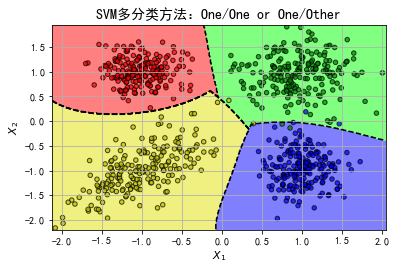

In [7]:
import numpy as np
from sklearn import svm
from scipy import stats
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt


def extend(a, b, r=0.01):
    return a * (1 + r) - b * r, -a * r + b * (1 + r)


np.random.seed(0)
N = 200
x = np.empty((4 * N, 2))
means = [(-1, 1), (1, 1), (1, -1), (-1, -1)]
sigmas = [
    np.eye(2), 2 * np.eye(2),
    np.diag((1, 2)),
    np.array(((3, 2), (2, 3)))
]
for i in range(4):
    mn = stats.multivariate_normal(means[i], sigmas[i] * 0.07)
    x[i * N:(i + 1) * N, :] = mn.rvs(N)
a = np.array((0, 1, 2, 3)).reshape((-1, 1))
y = np.tile(a, N).flatten()
clf = svm.SVC(C=1, kernel='rbf', gamma=1, decision_function_shape='ovo')
# clf = svm.SVC(C=1, kernel='linear', decision_function_shape='ovr')
clf.fit(x, y)
y_hat = clf.predict(x)
acc = accuracy_score(y, y_hat)
np.set_printoptions(suppress=True)
print('预测正确的样本个数：%d，正确率：%.2f%%' % (round(acc * 4 * N), 100 * acc))
# decision_function
print(clf.decision_function(x))
print(y_hat)

x1_min, x2_min = np.min(x, axis=0)
x1_max, x2_max = np.max(x, axis=0)
x1_min, x1_max = extend(x1_min, x1_max)
x2_min, x2_max = extend(x2_min, x2_max)
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
x_test = np.stack((x1.flat, x2.flat), axis=1)
y_test = clf.predict(x_test)
y_test = y_test.reshape(x1.shape)
cm_light = mpl.colors.ListedColormap(
    ['#FF8080', '#80FF80', '#8080FF', '#F0F080'])
cm_dark = mpl.colors.ListedColormap(['r', 'g', 'b', 'y'])
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_test, cmap=cm_light, shading='auto')
plt.contour(x1, x2, y_test, levels=(0, 1, 2), colors='k', linestyles='--')
plt.scatter(x[:, 0],
            x[:, 1],
            s=20,
            c=y,
            cmap=cm_dark,
            edgecolors='k',
            alpha=0.7)
plt.xlabel('$X_1$', fontsize=11)
plt.ylabel('$X_2$', fontsize=11)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(b=True)
plt.tight_layout(pad=2.5)
plt.title('SVM多分类方法：One/One or One/Other', fontsize=14)
plt.show()


#### 朴素贝叶斯


In [28]:
class NBClassify(object):
    def __init__(self, fillNa=1):
        self.fillNa = 1
        pass

    def train(self, trainSet):
        # 计算每种类别的概率
        # 保存所有tag的所有种类，及它们出现的频次
        dictTag = {}
        for subTuple in trainSet:
            dictTag[str(
                subTuple[1])] = 1 if str(subTuple[1]) not in dictTag.keys(
                ) else dictTag[str(subTuple[1])] + 1
        # 保存每个tag本身的概率
        tagProbablity = {}
        totalFreq = sum([value for value in dictTag.values()])
        for key, value in dictTag.items():
            tagProbablity[key] = value / totalFreq
        # print(tagProbablity)
        self.tagProbablity = tagProbablity
        ##############################################################################
        # 计算特征的条件概率
        # 保存特征属性基本信息{特征1:{值1:出现5次, 值2:出现1次}, 特征2:{值1:出现1次, 值2:出现5次}}
        dictFeaturesBase = {}
        for subTuple in trainSet:
            for key, value in subTuple[0].items():
                if key not in dictFeaturesBase.keys():
                    dictFeaturesBase[key] = {value: 1}
                else:
                    if value not in dictFeaturesBase[key].keys():
                        dictFeaturesBase[key][value] = 1
                    else:
                        dictFeaturesBase[key][value] += 1
        # dictFeaturesBase = {
        # '职业': {'农夫': 1, '教师': 2, '建筑工人': 2, '护士': 1},
        # '症状': {'打喷嚏': 3, '头痛': 3}
        # }
        dictFeatures = {}.fromkeys([key for key in dictTag])
        for key in dictFeatures.keys():
            dictFeatures[key] = {}.fromkeys([key for key in dictFeaturesBase])
        for key, value in dictFeatures.items():
            for subkey in value.keys():
                value[subkey] = {}.fromkeys(
                    [x for x in dictFeaturesBase[subkey].keys()])
        # dictFeatures = {
        #  '感冒 ': {'症状': {'打喷嚏': None, '头痛': None}, '职业': {'护士': None, '农夫': None, '建筑工人': None, '教师': None}},
        #  '脑震荡': {'症状': {'打喷嚏': None, '头痛': None}, '职业': {'护士': None, '农夫': None, '建筑工人': None, '教师': None}},
        #  '过敏 ': {'症状': {'打喷嚏': None, '头痛': None}, '职业': {'护士': None, '农夫': None, '建筑工人': None, '教师': None}}
        #  }
        # initialise dictFeatures
        for subTuple in trainSet:
            for key, value in subTuple[0].items():
                dictFeatures[subTuple[1]][key][value] = 1 if dictFeatures[
                    subTuple[1]][key][value] == None else dictFeatures[
                        subTuple[1]][key][value] + 1
        # print(dictFeatures)
        # 将驯良样本中没有的项目，由None改为一个非常小的数值，表示其概率极小而并非是零
        for tag, featuresDict in dictFeatures.items():
            for featureName, fetureValueDict in featuresDict.items():
                for featureKey, featureValues in fetureValueDict.items():
                    if featureValues == None:
                        fetureValueDict[featureKey] = 1
        # 由特征频率计算特征的条件概率P(feature|tag)
        for tag, featuresDict in dictFeatures.items():
            for featureName, fetureValueDict in featuresDict.items():
                totalCount = sum(
                    [x for x in fetureValueDict.values() if x != None])
                for featureKey, featureValues in fetureValueDict.items():
                    fetureValueDict[
                        featureKey] = featureValues / totalCount if featureValues != None else None
        self.featuresProbablity = dictFeatures
        ##############################################################################
    def classify(self, featureDict):
        resultDict = {}
        # 计算每个tag的条件概率
        for key, value in self.tagProbablity.items():
            iNumList = []
            for f, v in featureDict.items():
                if self.featuresProbablity[key][f][v]:
                    iNumList.append(self.featuresProbablity[key][f][v])
            conditionPr = 1
            for iNum in iNumList:
                conditionPr *= iNum
            resultDict[key] = value * conditionPr
        # 对比每个tag的条件概率的大小
        resultList = sorted(resultDict.items(),
                            key=lambda x: x[1],
                            reverse=True)
        return resultList[0][0]


if __name__ == '__main__':
    trainSet = [
        ({
            "症状": "打喷嚏",
            "职业": "护士"
        }, "感冒 "),
        ({
            "症状": "打喷嚏",
            "职业": "农夫"
        }, "过敏 "),
        ({
            "症状": "头痛",
            "职业": "建筑工人"
        }, "脑震荡"),
        ({
            "症状": "头痛",
            "职业": "建筑工人"
        }, "感冒 "),
        ({
            "症状": "打喷嚏",
            "职业": "教师"
        }, "感冒 "),
        ({
            "症状": "头痛",
            "职业": "教师"
        }, "脑震荡"),
    ]
    monitor = NBClassify()
    # trainSet is something like that [(featureDict, tag), ]
    monitor.train(trainSet)
    # 打喷嚏的建筑工人
    # 请问他患上感冒的概率有多大？
    result = monitor.classify({"症状": "打喷嚏", "职业": "建筑工人"})
    print(result)


感冒 


#### 多元问题-菜肴分类

##### 数据加载与清洗


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

df = pd.read_csv('./_data_set/cuisines_classification/cuisines.csv')

df.head()

# df.info()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


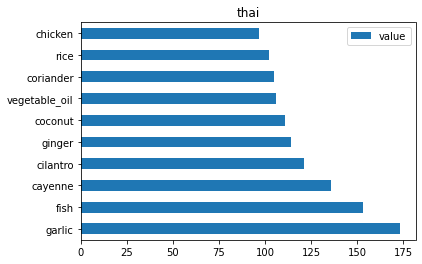

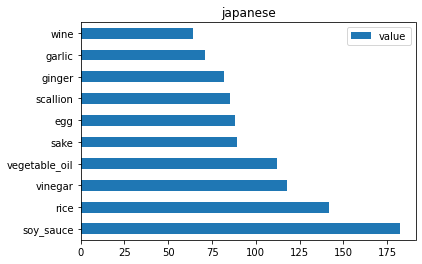

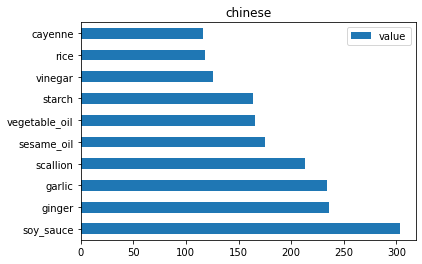

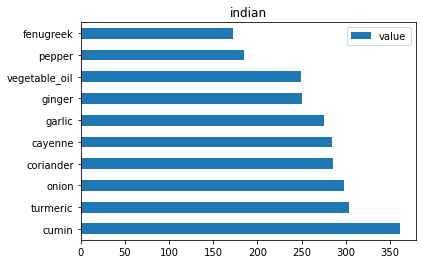

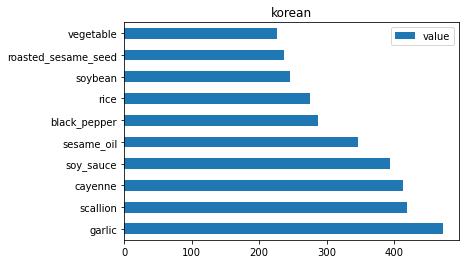

In [27]:
# 菜肴成分分析
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine',
                               'Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value',
                                              ascending=False,
                                              inplace=False)
    return ingredient_df

# 分析原料使用率前十
for i in ["thai", "japanese", "chinese", "indian", "korean"]:
    ingredient_df = create_ingredient_df(df[(df.cuisine == i)])
    ingredient_df.head(10).plot.barh().set_title(i)

# 删掉并不重要的特征
feature_df = df.drop(['cuisine', 'Unnamed: 0', 'rice', 'garlic', 'ginger'],
                     axis=1)
labels_df = df.cuisine

In [28]:
# 菜肴样本不均,平衡数据集
transformed_feature_df, transformed_label_df = SMOTE().fit_resample(
    feature_df, labels_df)

# 烂方法展示
# for i in ["thai", "japanese", "chinese", "indian", "korean"]:
#     print(i, df.loc[df['cuisine'] == i].shape)

# nicer one
print(
    f'===================== old label count: ===================== \n{labels_df.value_counts()}\
    \n===================== new label count: ===================== \n{transformed_label_df.value_counts()}'
)

transformed_df = pd.concat([transformed_label_df, transformed_feature_df],
                           axis=1,
                           join='outer')
# transformed_df.head()
transformed_df.info()
transformed_df.to_csv("./_data_set/cuisines_classification/cleaned_cuisines.csv")

===================== old label count: ===================== 
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64    
===================== new label count: ===================== 
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: cuisine, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, cuisine to zucchini
dtypes: int64(380), object(1)
memory usage: 11.6+ MB


##### 分类-1


In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.svm import SVC
import numpy as np

cuisines_df = pd.read_csv(
    "./_data_set/cuisines_classification/cleaned_cuisines.csv")

cuisines_df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
cuisines_label_df = cuisines_df['cuisine']
cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df,
                                                    cuisines_label_df,
                                                    test_size=0.3)

"""
1137      korean
428         thai
191       indian
1336      korean
3947        thai
          ...
3335    japanese
3539        thai
436         thai
1875      indian
3079    japanese
Name: cuisine, Length: 2796, dtype: object
['korean' 'thai' 'indian' ... 'thai' 'indian' 'japanese']
 """
# print(y_train)
# print(np.ravel(y_train))

# lbfgs = LogisticRegression(solver='lbfgs')
model = LogisticRegression(multi_class='ovr',
                           solver='liblinear').fit(X_train, np.ravel(y_train))

accuracy = model.score(X_test, y_test)

# print("Accuracy is {}".format(accuracy))
print(f"Accuracy is {accuracy}")

Accuracy is 0.7906588824020017


In [10]:
# [选择性 test] 针对某一行测试

line_num = 50

print(f'ingredients: {X_test.iloc[line_num][X_test.iloc[line_num]!=0].keys()}')
print(f'cuisine: {y_test.iloc[line_num]}')

test = X_test.iloc[line_num].values.reshape(-1, 1).T
proba = model.predict_proba(test)
classes = model.classes_
resultdf = pd.DataFrame(data=proba, columns=classes)

topPrediction = resultdf.T.sort_values(by=[0], ascending=[False])
topPrediction.head()

ingredients: Index(['butter', 'cayenne', 'cheese', 'cinnamon', 'coriander', 'onion',
       'tomato', 'turmeric'],
      dtype='object')
cuisine: indian


D:\Scoop\apps\anaconda3\current\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0
indian,0.962110
thai,0.021403
korean,0.011124
japanese,0.003710
chinese,0.001653


In [12]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     chinese       0.76      0.68      0.72       242
      indian       0.91      0.93      0.92       239
    japanese       0.72      0.76      0.74       222
      korean       0.84      0.80      0.82       264
        thai       0.77      0.84      0.80       232

    accuracy                           0.80      1199
   macro avg       0.80      0.80      0.80      1199
weighted avg       0.80      0.80      0.80      1199



##### 分类-2


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, precision_recall_curve
import numpy as np
import pandas as pd

cuisines_df = pd.read_csv(
    "./_data_set/cuisines_classification/cleaned_cuisines.csv")

cuisines_label_df = cuisines_df['cuisine']
cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df,
                                                    cuisines_label_df,
                                                    test_size=0.3)


In [9]:
# 正则化系数
C = 10

# 创建不同的分类器
classifiers = {
    # 线性 SVC 分类器
    'Linear SVC': SVC(kernel='linear', C=C, probability=True, random_state=0),
    # K-近邻分类器
    'KNN classifier': KNeighborsClassifier(C),
    # Support Vector 分类器
    'SVC': SVC(),
    # 集成分类器, 随机森林 与 ADA
    'RFST': RandomForestClassifier(n_estimators=100),
    'ADA': AdaBoostClassifier(n_estimators=100)
}

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, np.ravel(y_train))

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%%" % (name, accuracy * 100))
    print(classification_report(y_test, y_pred))


Accuracy (train) for Linear SVC: 80.2%
              precision    recall  f1-score   support

     chinese       0.73      0.76      0.74       250
      indian       0.86      0.89      0.88       235
    japanese       0.78      0.78      0.78       245
      korean       0.88      0.74      0.80       227
        thai       0.78      0.84      0.81       242

    accuracy                           0.80      1199
   macro avg       0.81      0.80      0.80      1199
weighted avg       0.81      0.80      0.80      1199

Accuracy (train) for KNN classifier: 73.6%
              precision    recall  f1-score   support

     chinese       0.71      0.73      0.72       250
      indian       0.80      0.86      0.83       235
    japanese       0.67      0.80      0.73       245
      korean       0.91      0.51      0.65       227
        thai       0.69      0.77      0.73       242

    accuracy                           0.74      1199
   macro avg       0.76      0.73      0.73      

### 聚类问题

#### 聚类入门-数据分布


In [9]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./_data_set/Clustering/nigerian-songs.csv")
# df.head()
df.info()
# object 类型除外
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


<AxesSubplot:>

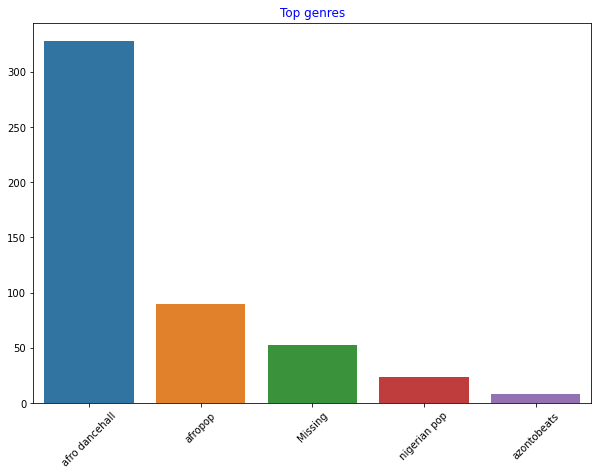

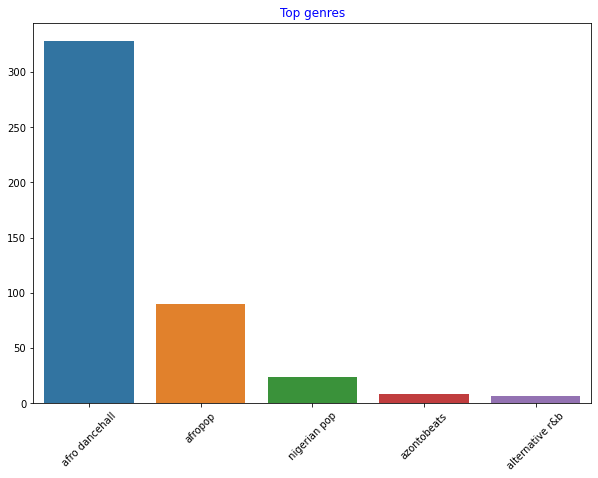

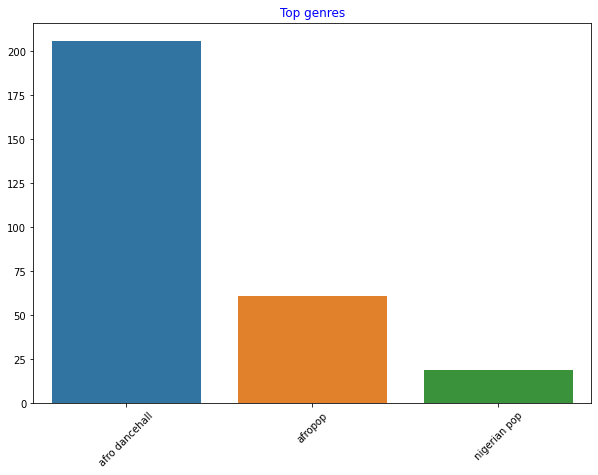

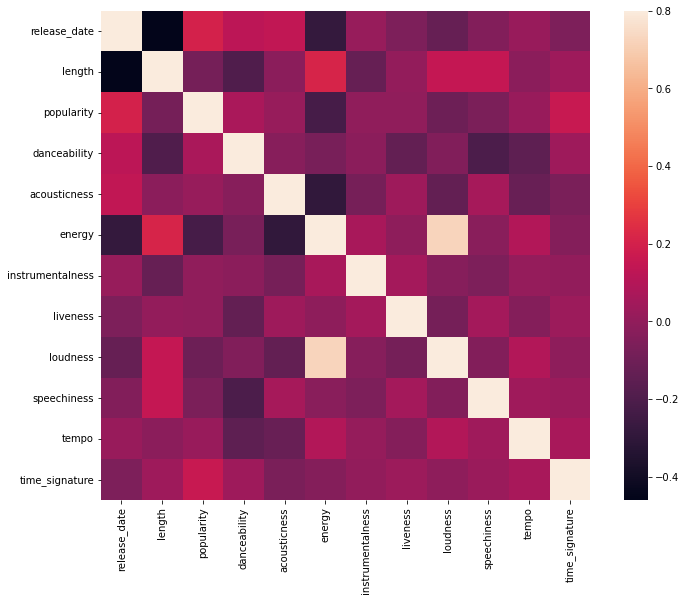

In [14]:
import seaborn as sns


def draw(df):
    top = df['artist_top_genre'].value_counts()
    plt.figure(figsize=(10, 7))
    sns.barplot(x=top[:5].index, y=top[:5].values)
    plt.xticks(rotation=45)
    plt.title('Top genres', color='blue')


draw(df)

# 过滤掉 Missing
new_df = df[df['artist_top_genre'] != 'Missing']
draw(new_df)

featured_df = new_df[((new_df['artist_top_genre'] == 'afro dancehall')
                      | (new_df['artist_top_genre'] == 'afropop')
                      | (new_df['artist_top_genre'] == 'nigerian pop'))
                     & (new_df['popularity'] > 0)]
draw(featured_df)

corrmat = featured_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

#### K-Means-与衡量指标

##### 入门-音乐分类


In [4]:
# 这种格式可以运行
!pip install seaborn


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("./_data_set/Clustering/nigerian-songs.csv")
df.head()

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


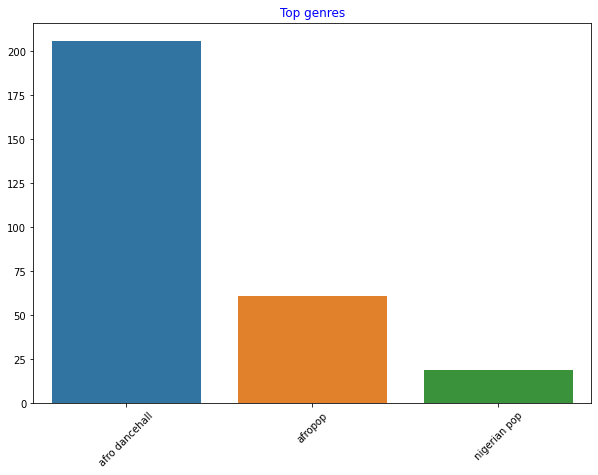

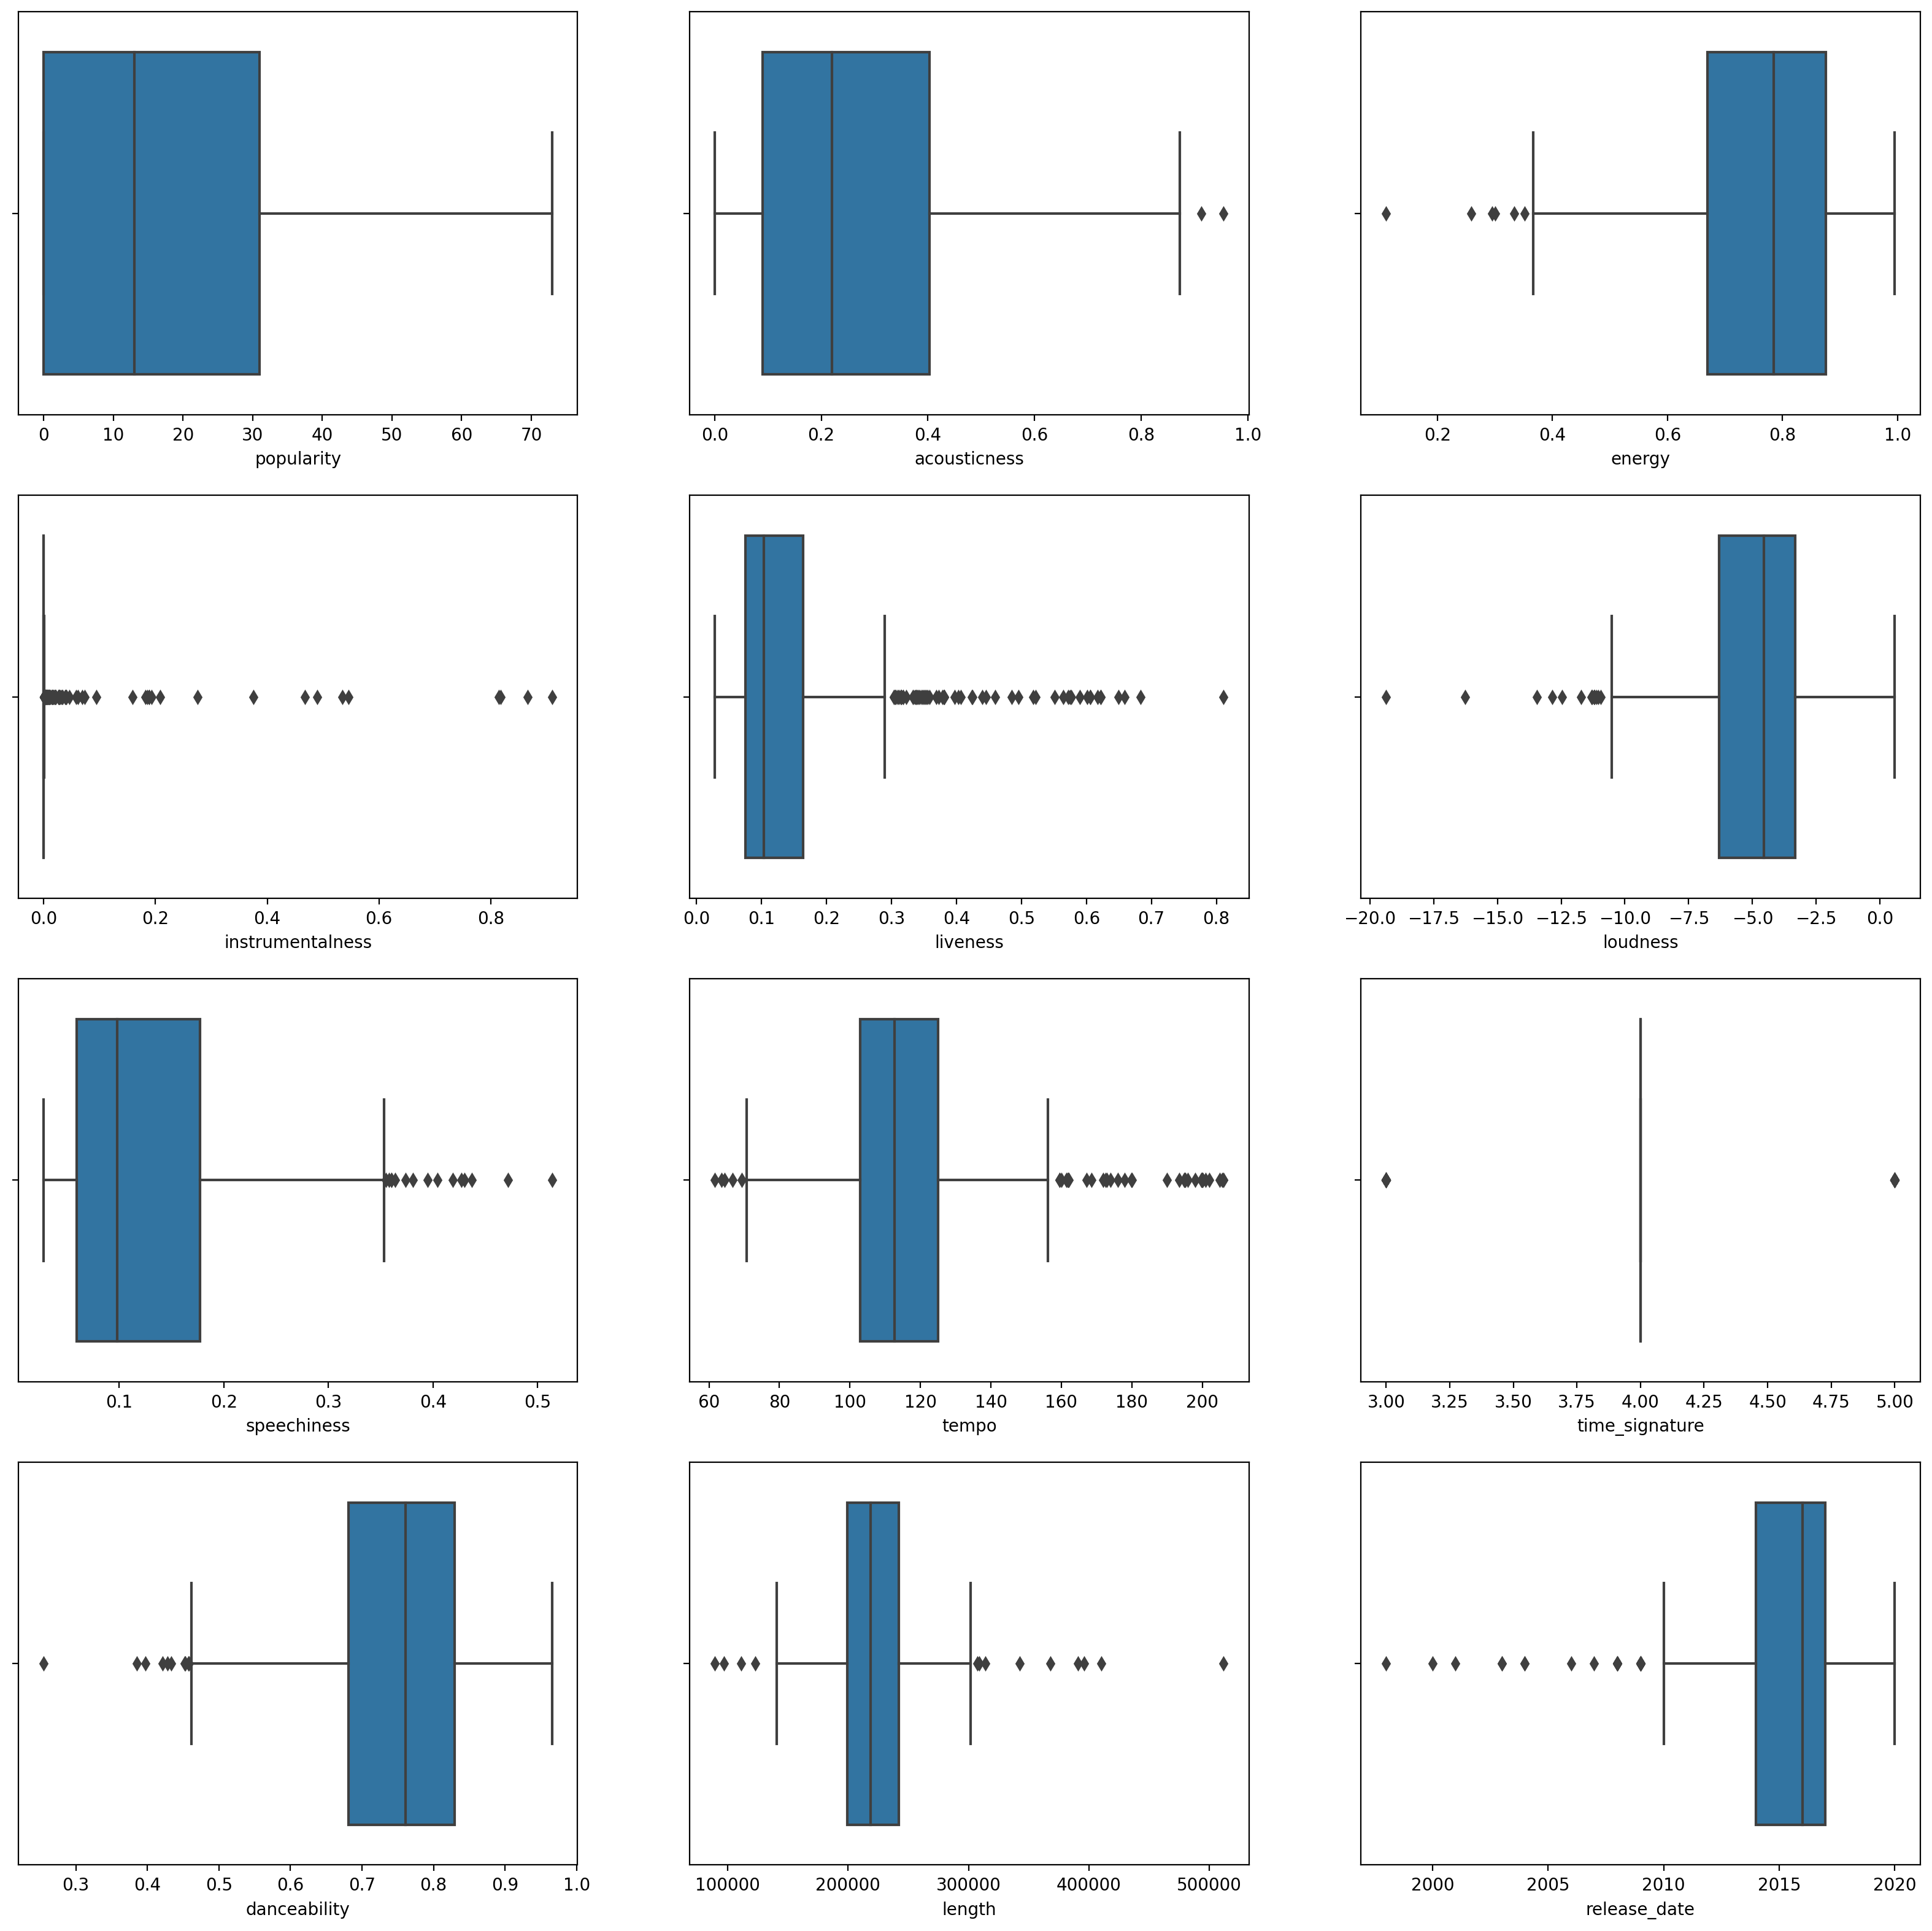

In [14]:
fetured_df = df[((df['artist_top_genre'] == 'afro dancehall')
                 | (df['artist_top_genre'] == 'afropop')
                 | (df['artist_top_genre'] == 'nigerian pop'))
                & (df['popularity'] > 0)]

top = fetured_df['artist_top_genre'].value_counts()
plt.figure(figsize=(10, 7))
sns.barplot(x=top.index, y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres', color='blue')

# 箱线图, 可以直观看出数据的分布
plt.figure(figsize=(20, 20), dpi=200)

"""
  plt.subplot(4, 3, 1)
  sns.boxplot(x='popularity', data=df)

  plt.subplot(4, 3, 2)
  sns.boxplot(x='acousticness', data=df)

  plt.subplot(4, 3, 3)
  sns.boxplot(x='energy', data=df)

  plt.subplot(4, 3, 4)
  sns.boxplot(x='instrumentalness', data=df)

  plt.subplot(4, 3, 5)
  sns.boxplot(x='liveness', data=df)

  plt.subplot(4, 3, 6)
  sns.boxplot(x='loudness', data=df)

  plt.subplot(4, 3, 7)
  sns.boxplot(x='speechiness', data=df)

  plt.subplot(4, 3, 8)
  sns.boxplot(x='tempo', data=df)

  plt.subplot(4, 3, 9)
  sns.boxplot(x='time_signature', data=df)

  plt.subplot(4, 3, 10)
  sns.boxplot(x='danceability', data=df)

  plt.subplot(4, 3, 11)
  sns.boxplot(x='length', data=df)

  plt.subplot(4, 3, 12)
  sns.boxplot(x='release_date', data=df)
 """
for i, v in enumerate([
        "popularity", "acousticness", "energy", "instrumentalness", "liveness",
        "loudness", "speechiness", "tempo", "time_signature", "danceability",
        "length", "release_date"
]):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=v, data=df)
    # plt.title(v)


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics

le = LabelEncoder()

X = df.loc[:, ('artist_top_genre', 'popularity', 'danceability',
               'acousticness', 'loudness', 'energy')]
X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])
y = le.transform(df['artist_top_genre'])

# 聚为3类
nclusters = 3
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed).fit(X)

# Predict the cluster for each data point
y_cluster_kmeans = km.predict(X)
print(y_cluster_kmeans)

score = metrics.silhouette_score(X, y_cluster_kmeans)
# score 从 [-1,1], 越大表示聚类效果越好
print(score)

[2 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 1 0 0 2 1 1 2 2 2 0
 2 0 1 2 2 2 0 1 1 2 1 0 0 0 0 1 1 1 1 1 2 0 2 1 0 2 0 1 2 1 2 1 1 1 1 2 1
 0 2 2 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 2 1 0 0 1 1 1 0 0 1 0 1 2 0 1 1 2 0 1
 1 1 1 1 1 1 0 1 0 1 0 1 0 2 1 2 0 1 1 1 0 0 1 1 0 2 0 1 1 0 0 0 1 1 0 1 0
 2 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 2 1 1 1 1 1 0
 1 1 1 1 0 2 0 0 0 0 0 0 1 1 2 1 1 1 1 1 2 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0
 1 2 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 2 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1
 2 0 0 1 1 0 0 0 1 0 0 1 1 1 2 1 1 2 0 0 1 0 1 1 0 1 1 1 0 2 1 1 2 2 2 0 2
 2 2 2 2 2 2 2 1 2 2 1 2 1 2 1 2 2 2 0 1 0 1 1 0 1 2 1 1 2 1 0 2 2 0 0 0 1
 0 1 0 1 1 1 1 2 1 1 2 2 1 0 2 0 2 1 1 2 2 2 0 0 2 2 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 2 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 0 0 0 1 2 1 1 2 1 0 0 0 2 2 2 0 2
 2 2 0 2 2 0 1 0 1 2 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 1 1 2 

D:\Scoop\apps\anaconda3\current\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\Scoop\apps\anaconda3\current\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


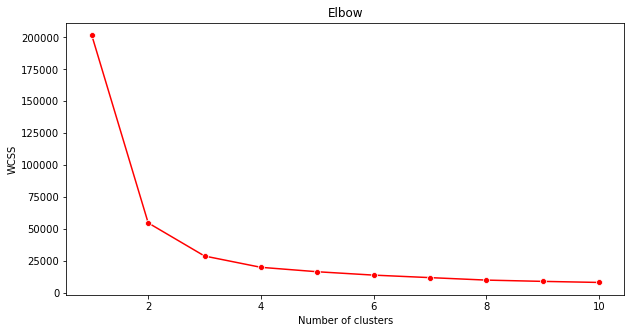

In [9]:
# 手肘方法: 拐点附近就是较好的聚类划分
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
sns.lineplot(range(1, 11), wcss, marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

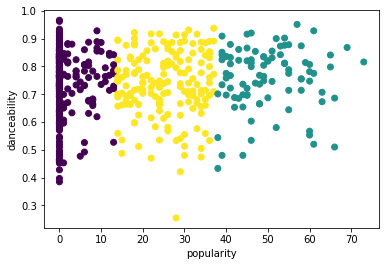

93/530 samples were correctly labeled.
Accuracy score: 0.18


In [14]:
# 初始值的随机选取会影响每次的结果
kmeans = KMeans(n_clusters=3).fit(X)

# 0 | 1 | 2
labels = kmeans.predict(X)
plt.scatter(df['popularity'], df['danceability'], c=labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

# 真实值 与 与预测值集合的交集 元素个数
correct_labels = sum(y == kmeans.labels_)

print("%d/%d samples were correctly labeled." %
      (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels / float(y.size)))


##### sample-2

1
Homogeneity: 1.0
completeness: 1.0
V measure: 1.0
AMI: 1.0
ARI: 1.0
Silhouette: 0.616436816839852 

2
Homogeneity: 0.9898828240244267
completeness: 0.9899006758819153
V measure: 0.9898917498726852
AMI: 0.9898081557479033
ARI: 0.9933165272203728
Silhouette: 0.6189656317733315 

3
Homogeneity: 1.0
completeness: 1.0
V measure: 1.0
AMI: 1.0
ARI: 1.0
Silhouette: 0.5275987244664399 

4
Homogeneity: 0.7296158940840607
completeness: 0.7315285272632114
V measure: 0.7305709588584066
AMI: 0.7283397010755561
ARI: 0.6783811042853299
Silhouette: 0.5366236044449266 

5
Homogeneity: 1.0
completeness: 1.0
V measure: 1.0
AMI: 1.0
ARI: 1.0
Silhouette: 0.4790725752982868 

6
Homogeneity: 0.7449364376693913
completeness: 0.7755445167472191
V measure: 0.7599323988656883
AMI: 0.757903292819801
ARI: 0.7113213508090338
Silhouette: 0.5737260449304202 

7
Homogeneity: 1.0
completeness: 1.0
V measure: 1.0
AMI: 1.0
ARI: 1.0
Silhouette: 0.5975066093204152 

8
Homogeneity: 0.9776347312784609
completeness: 0.972863

C:\Users\utsuk\AppData\Local\Temp\ipykernel_28356\867049078.py:57: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(2, rect=(0, 0, 1, 0.95))


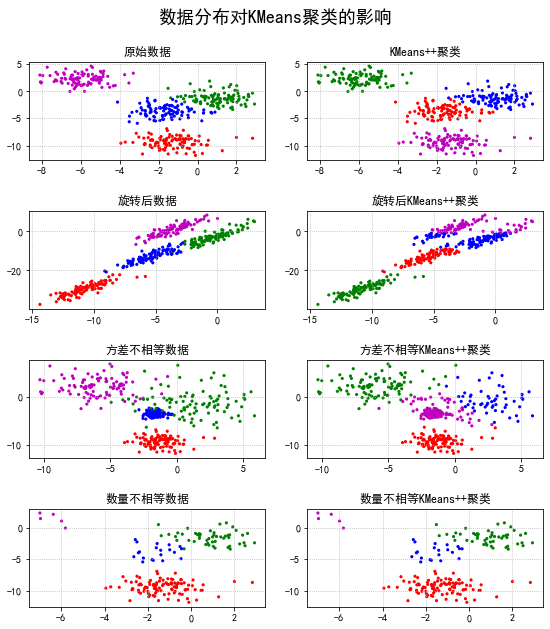

In [1]:
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt
import sklearn.datasets as ds
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_mutual_info_score,\
    adjusted_rand_score, silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


def expand(a, b):
    d = (b - a) * 0.1
    return a - d, b + d


N = 400
centers = 4
data, y = ds.make_blobs(N, n_features=2, centers=centers, random_state=2)
data2, y2 = ds.make_blobs(N,
                          n_features=2,
                          centers=centers,
                          cluster_std=(1, 2.5, 0.5, 2),
                          random_state=2)
data3 = np.vstack(
    (data[y == 0][:], data[y == 1][:50], data[y == 2][:20], data[y == 3][:5]))
y3 = np.array([0] * 100 + [1] * 50 + [2] * 20 + [3] * 5)
m = np.array(((1, 1), (1, 3)))
data_r = data.dot(m)

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
cm = matplotlib.colors.ListedColormap(list('rgbm'))
data_list = data, data, data_r, data_r, data2, data2, data3, data3
y_list = y, y, y, y, y2, y2, y3, y3
titles = '原始数据', 'KMeans++聚类', '旋转后数据', '旋转后KMeans++聚类',\
          '方差不相等数据', '方差不相等KMeans++聚类', '数量不相等数据', '数量不相等KMeans++聚类'

model = KMeans(n_clusters=4, init='k-means++', n_init=5)
fig = plt.figure(figsize=(8, 9), facecolor='w')
for i, (x, y, title) in enumerate(zip(data_list, y_list, titles), start=1):
    # plt.subplot(4, 2, i)
    ax = fig.add_subplot(4, 2, i)
    plt.title(title)
    if i % 2 == 1:
        y_pred = y
    else:
        y_pred = model.fit_predict(x)
    print(i)
    print('Homogeneity:', homogeneity_score(y, y_pred))
    print('completeness:', completeness_score(y, y_pred))
    print('V measure:', v_measure_score(y, y_pred))
    print('AMI:', adjusted_mutual_info_score(y, y_pred))
    print('ARI:', adjusted_rand_score(y, y_pred))
    print('Silhouette:', silhouette_score(x, y_pred), '\n')
    ax.scatter(x[:, 0], x[:, 1], s=10, c=y_pred, cmap=cm, edgecolors='none')
    ax.grid(b=True, ls=':')
plt.tight_layout(2, rect=(0, 0, 1, 0.95))
plt.suptitle('数据分布对KMeans聚类的影响', fontsize=18)
plt.show()


#### 层次聚类


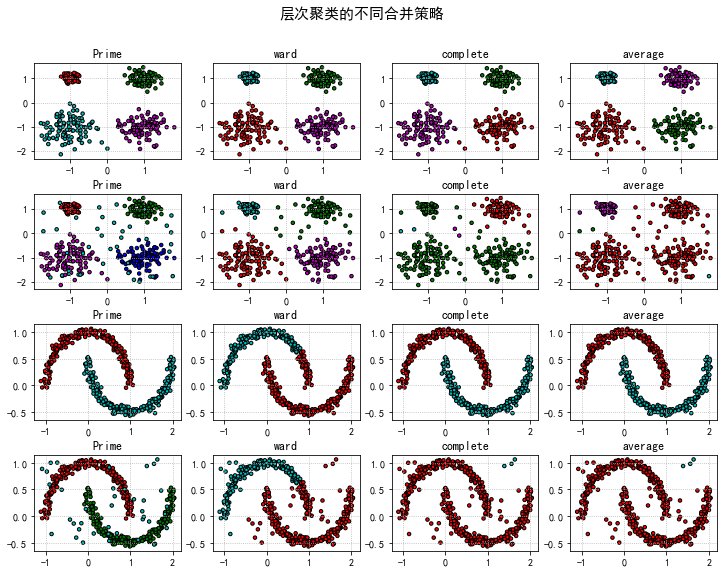

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
import sklearn.datasets as ds
import warnings


def expand(a, b, r):
    d = (b - a) * r
    return a - d, b + d


if __name__ == '__main__':
    warnings.filterwarnings(action='ignore', category=UserWarning)
    np.set_printoptions(suppress=True)
    np.random.seed(0)
    n_clusters = 4
    N = 400
    data1, y1 = ds.make_blobs(n_samples=N,
                              n_features=2,
                              centers=((-1, 1), (1, 1), (1, -1), (-1, -1)),
                              cluster_std=(0.1, 0.2, 0.3, 0.4),
                              random_state=0)
    data1 = np.array(data1)
    n_noise = int(0.1 * N)
    r = np.random.rand(n_noise, 2)
    data_min1, data_min2 = np.min(data1, axis=0)
    data_max1, data_max2 = np.max(data1, axis=0)
    r[:, 0] = r[:, 0] * (data_max1 - data_min1) + data_min1
    r[:, 1] = r[:, 1] * (data_max2 - data_min2) + data_min2
    data1_noise = np.concatenate((data1, r), axis=0)
    y1_noise = np.concatenate((y1, [4] * n_noise))

    data2, y2 = ds.make_moons(n_samples=N, noise=.05)
    data2 = np.array(data2)
    n_noise = int(0.1 * N)
    r = np.random.rand(n_noise, 2)
    data_min1, data_min2 = np.min(data2, axis=0)
    data_max1, data_max2 = np.max(data2, axis=0)
    r[:, 0] = r[:, 0] * (data_max1 - data_min1) + data_min1
    r[:, 1] = r[:, 1] * (data_max2 - data_min2) + data_min2
    data2_noise = np.concatenate((data2, r), axis=0)
    y2_noise = np.concatenate((y2, [3] * n_noise))

    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False

    cm = mpl.colors.ListedColormap(['r', 'g', 'b', 'm', 'c'])
    plt.figure(figsize=(10, 8), facecolor='w')
    plt.cla()
    linkages = ("ward", "complete", "average")
    for index, (n_clusters, data, y) in enumerate(
        ((4, data1, y1), (4, data1_noise, y1_noise), (2, data2, y2),
         (2, data2_noise, y2_noise))):
        plt.subplot(4, 4, 4 * index + 1)
        plt.scatter(data[:, 0], data[:, 1], c=y, s=12, edgecolors='k', cmap=cm)
        plt.title('Prime', fontsize=12)
        plt.grid(b=True, ls=':')
        data_min1, data_min2 = np.min(data, axis=0)
        data_max1, data_max2 = np.max(data, axis=0)
        plt.xlim(expand(data_min1, data_max1, 0.05))
        plt.ylim(expand(data_min2, data_max2, 0.05))

        connectivity = kneighbors_graph(data,
                                        n_neighbors=7,
                                        mode='distance',
                                        metric='minkowski',
                                        p=2,
                                        include_self=True)
        connectivity = 0.5 * (connectivity + connectivity.T)
        for i, linkage in enumerate(linkages):
            ac = AgglomerativeClustering(n_clusters=n_clusters,
                                         affinity='euclidean',
                                         connectivity=connectivity,
                                         linkage=linkage)
            ac.fit(data)
            y = ac.labels_
            plt.subplot(4, 4, i + 2 + 4 * index)
            plt.scatter(data[:, 0],
                        data[:, 1],
                        c=y,
                        s=12,
                        edgecolors='k',
                        cmap=cm)
            plt.title(linkage, fontsize=12)
            plt.grid(b=True, ls=':')
            plt.xlim(expand(data_min1, data_max1, 0.05))
            plt.ylim(expand(data_min2, data_max2, 0.05))
    plt.suptitle('层次聚类的不同合并策略', fontsize=15)
    plt.tight_layout(0.5, rect=(0, 0, 1, 0.95))
    plt.show()


### 降维问题

#### 缺失值比率


In [5]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the data
train = pd.read_csv("./_data_set/降维问题/train_v9rqX0R.csv")

# checking the percentage of missing values in each variable
# 数据完整率 = (空数 / 所有数) * 100
a = train.isnull().sum() / len(train) * 100

# saving column names in a variable
variable = []
for i in range(0, 12):
    if a[i] <= 20:  #setting the threshold as 20%
        variable.append(train.columns[i])

# 缺失率大于阈值的列
print(variable)

['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']


#### 低方差过滤


In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the data
train = pd.read_csv("./_data_set/降维问题/train_v9rqX0R.csv")

# 填充空项
train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

# 填充后的缺失率
print(train.isnull().sum() / len(train) * 100)

numeric = train[[
    'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'
]]
var = numeric.var()
numeric = numeric.columns
variable = []
for i in range(0, len(var)):
    if var[i] >= 10:  #setting the threshold as 10%
        variable.append(numeric[i])

print(variable)


Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64
['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year']


## 代码相关

### 存储-读取模型


训练完成.
保存模型完成.
加载模型完成.


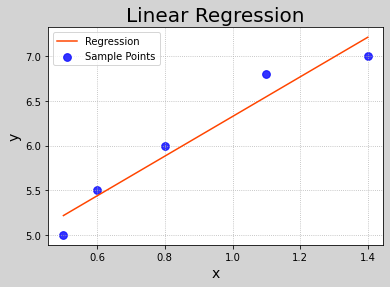

In [3]:
import numpy as np
import sklearn.linear_model as lm  # 线性模型
import sklearn.metrics as sm  # 模型性能评价模块
import matplotlib.pyplot as mp
import pickle

x = np.array([[0.5], [0.6], [0.8], [1.1], [1.4]])  # 输入集
y = np.array([5.0, 5.5, 6.0, 6.8, 7.0])  # 输出集

# 创建线性回归器
model = lm.LinearRegression()
# 用已知输入、输出数据集训练回归器
model.fit(x, y)

print("训练完成.")

# 保存训练后的模型
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)
    print("保存模型完成.")

######################### 加载模型 #########################
# 上面通过训练数据x,y 训练好了 x -> y 的线性回归模型
# 下面加载模型, 再给出测试数据 x, 查看模型预测结果直线与原始数据 (x,y) 的拟合度
with open('linear_model.pkl', 'rb') as f:
    model = pickle.load(f)
    print("加载模型完成.")

# 根据加载的模型预测输出
pred_y = model.predict(x)

# 可视化回归曲线
mp.figure('Linear Regression', facecolor='lightgray')
mp.title('Linear Regression', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.scatter(x, y, c='blue', alpha=0.8, s=60, label='Sample Points')

mp.plot(x, pred_y, c='orangered', label='Regression')

mp.legend()
mp.show()

### Web-app

#### 一

train 一个逻辑回归模型并用 pickle 打包

然后load

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import pickle

ufos = pd.read_csv('./_data_set/web-app/1/ufos.csv')
# ufos.head()

ufos = pd.DataFrame({
    'Seconds': ufos['duration (seconds)'],
    'Country': ufos['country'],
    'Latitude': ufos['latitude'],
    'Longitude': ufos['longitude']
})

ufos.Country.unique()

ufos.dropna(inplace=True)
ufos = ufos[(ufos['Seconds'] >= 1) & (ufos['Seconds'] <= 60)]

# ufos.info()

# ['us', nan, 'gb', 'ca', 'au', 'de'] -> 0-5
ufos['Country'] = LabelEncoder().fit_transform(ufos['Country'])

ufos.head()

# ======================== 准备完成 ==============================

x = ufos[['Seconds', 'Latitude', 'Longitude']]
y = ufos['Country']
# ['Seconds', 'Latitude', 'Longitude']  ==>  'Country'
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

# default max_iter=100 会超限
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print('Predicted labels: ', y_pred)
print('Accuracy: ', accuracy_score(y_test, y_pred))

# ======================== 打包 model ==============================

model_name = './_data_set/web-app/1/ufo-model.pkl'

pickle.dump(model, open(model_name, 'wb'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.85      0.47      0.60       250
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00       131
           4       0.97      1.00      0.98      4743

    accuracy                           0.97      5173
   macro avg       0.96      0.89      0.92      5173
weighted avg       0.97      0.97      0.97      5173

Predicted labels:  [4 4 4 ... 3 4 4]
Accuracy:  0.9702300405953992


In [11]:
model_load = pickle.load(open(model_name, 'rb'))
print(model_load.predict([[50, 44, -12]]))

[3]


D:\Scoop\apps\anaconda3\current\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### 二


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

data = pd.read_csv('./_data_set/cuisines_classification/cleaned_cuisines.csv')

# 删除前两列无用的列
X = data.iloc[:, 2:]
y = data[['cuisine']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = SVC(kernel='linear', C=10, probability=True, random_state=0)
# model.fit(X_train, np.revel(y_train))
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     chinese       0.73      0.68      0.70       242
      indian       0.89      0.88      0.88       246
    japanese       0.80      0.79      0.79       262
      korean       0.82      0.75      0.78       229
        thai       0.75      0.88      0.81       220

    accuracy                           0.79      1199
   macro avg       0.79      0.80      0.79      1199
weighted avg       0.80      0.79      0.79      1199



In [4]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# 张量为 380
initial_type = [('float_input', FloatTensorType([None, 380]))]
options = {id(model): {'nocl': True, 'zipmap': False}}

onx = convert_sklearn(model, initial_types=initial_type, options=options)
with open("./_data_set/web-app/2/model.onnx", "wb") as f:
    f.write(onx.SerializeToString())

## 信息论

### 两点分布信息熵


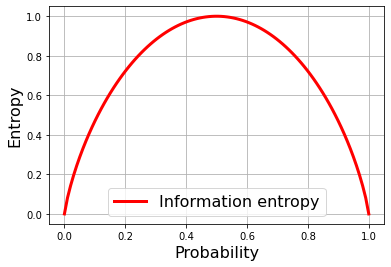

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 因为 ln0 无定义, 用此值模拟趋近 0
eps = 1e-5

# probability
p = np.linspace(eps, 1 - eps, 100)

# Information entropy
h = -(1 - p) * np.log2(1 - p) - p * np.log2(p)

plt.plot(p, h, label='Information entropy', color='red', lw=3)
plt.xlabel('Probability', fontsize=16)
plt.ylabel('Entropy', fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.grid(True)
plt.show()

# 结果中信息熵的峰值取决于 log 底数, e为底时峰值为0.7左右, 2为底峰值为1

### 基尼系数与-ln


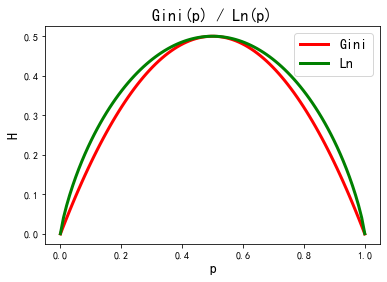

In [4]:
import numpy as np
import matplotlib.pyplot as plt

eps = 1e-4
p = np.linspace(eps, 1 - eps, 100)
h = -(1 - p) * np.log2(1 - p) - p * np.log2(p)
gini = 2 * (1 - p) * p

plt.plot(p, gini, 'r-', lw=3)
plt.plot(p, h / 2, 'g-', lw=3)
plt.title('Gini(p) / Ln(p)', fontsize=16)
plt.xlabel('p', fontsize=14)
plt.ylabel('H', fontsize=14)
plt.legend(['Gini', 'Ln'], loc='best', fontsize=14)
plt.show()

<a>![分割线](https://cdn.jsdelivr.net/gh/Weidows/Weidows/image/divider.png)</a>

## 借物表

<a name='cite_note-1' href='#cite_ref-1'>[1]</a>: https://discover304.top/

<a name='cite_note-2' href='#cite_ref-2'>[2]</a>: [【上海交大】【腾讯】强强联合 机器学习+深度学习](https://www.bilibili.com/video/BV16L411w7oQ?p=6)

<a name='cite_note-3' href='#cite_ref-3'>[3]</a>: [The Ultimate Guide to 12 Dimensionality Reduction Techniques (with Python codes)](https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/)

<a name='cite_note-4' href='#cite_ref-4'>[4]</a>: https://github.com/microsoft/ML-For-Beginners